<left><img width=100% height=100% src="img/itu_logo.png"></left>

## Lecture 06: K-Fold Cross-Validation for Model Assesment and Model Selection

### __Gül İnan__<br><br>Istanbul Technical University

## Auto MPG dataset

The [Auto mpg](https://www.statlearning.com/s/Auto.csv) data set aims to predict the `mpg` (miles per gallon), in other words, fuel efficiency, of a car given some car related predictors:

The variables in the data set are:
  - `mpg`: fuel consumption (miles per gallon) (continuous).
  - `cylinders`: the number of cylinders (multi-valued discrete).
  - `displacement`: the volume of the car's engine (continuous).
  - `horsepower`: the power of the engine (continuous).
  - `weight`: the weight of the car (continuous).
  - `acceleration`: (continuous).
  - `model year`: (multi-valued discrete).
  - `origin`: origin of the car (multi-valued discrete).
  - `car name`: (string - unique).        
 
For this example, we are interested in understanding how the feature `horsepower` affects the `mpg` of a car.

Let's first import the `Auto mpg` data set. 

In [1]:
#import the data set
import pandas as pd

auto_df = pd.read_csv('datasets/Auto.csv', sep=";") 
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
#shape of the data set
auto_df.shape

(397, 9)

In [3]:
#take a look at the data
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    int64  
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.0+ KB


Prior to model building, split the data set as train and test sets.

In [4]:
#Prepare X and y

auto_X = auto_df[["horsepower"]]
auto_y = auto_df[["mpg"]] 

In [5]:
from sklearn.model_selection import train_test_split

auto_X_bigtrain, auto_X_test, auto_y_bigtrain, auto_y_test = train_test_split(auto_X, auto_y, 
                                                                              test_size=0.2, 
                                                                              random_state=1300)

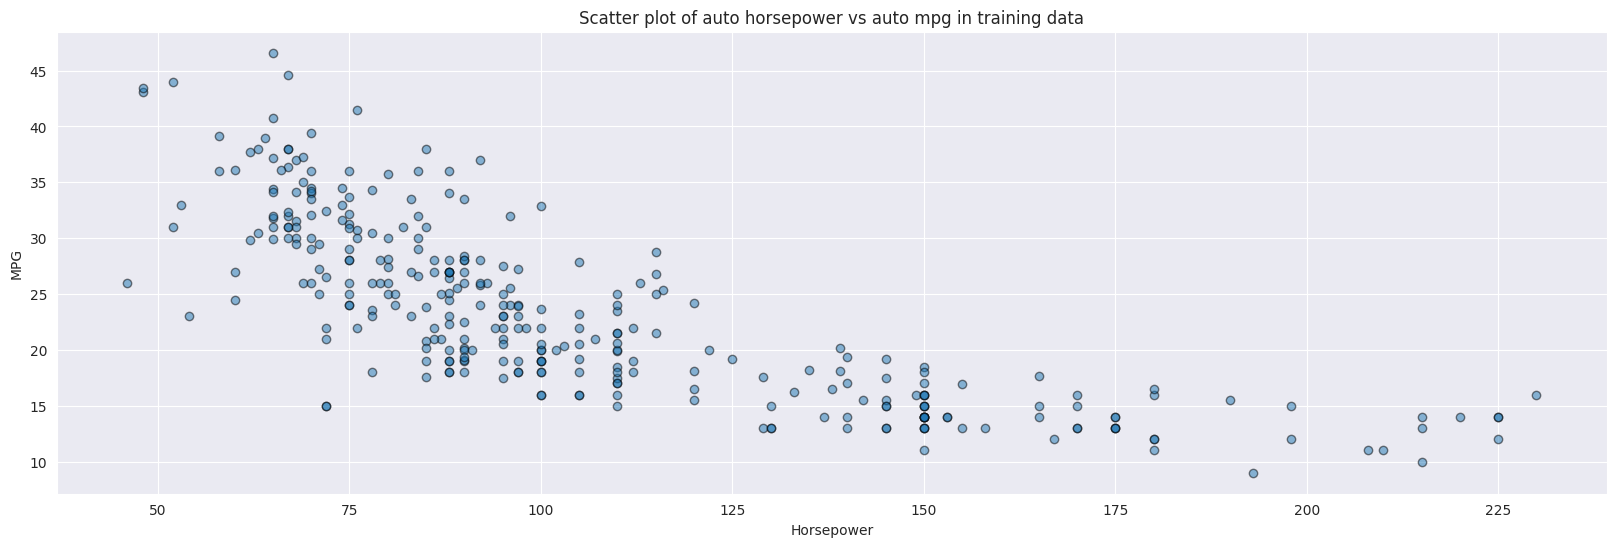

In [6]:
#investigate the relationship between two variables
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 6]

plt.scatter(x=auto_X_bigtrain.horsepower, y=auto_y_bigtrain, edgecolors='k', alpha=.5)
plt.title('Scatter plot of auto horsepower vs auto mpg in training data')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show();

We would like to build a predictive model for `mpg` based on `horsepower`.

In [7]:
from sklearn import set_config
set_config(transform_output="pandas")  

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

#assign arbitrary random states
r_state = [1300, 2300, 3300, 4300, 5300]

for rs in r_state:
    
    auto_X_bigtrain, auto_X_test, auto_y_bigtrain, auto_y_test = train_test_split(auto_X, auto_y, test_size=0.2, random_state=rs)

    pipe = make_pipeline(PolynomialFeatures(degree=1, include_bias=False),  LinearRegression())
                    
    pipe.fit(auto_X_bigtrain, auto_y_bigtrain)

    y_test_pred = pipe.predict(auto_X_test)
    
    mse_test = mean_squared_error(auto_y_test, y_test_pred)
    
    print(('Random State: %.f' % rs) , 'MSE on Test Data: %.4f' % mse_test)

Random State: 1300 MSE on Test Data: 19.3768
Random State: 2300 MSE on Test Data: 23.7249
Random State: 3300 MSE on Test Data: 26.1663
Random State: 4300 MSE on Test Data: 19.4568
Random State: 5300 MSE on Test Data: 20.2168


In [8]:
#(19.3768 + 23.7249 + 26.1663 + 19.4568 + 20.2168)/5

In a data set, there can be a data point which is an extremum (e.g., in the auto mpg data set it may be a car with very low horsepower or very high horsepower). Depending on in which split (train or test split) this extrememum point falls into, model's performance on the test data can be different. 

To get a more **stable generalization performance** of the model, solution would be to **perform multiple splits rather than one-time split**.

## Cross-Validation Approach for Model Assesment

The process of evaluation a model's performance is known as `model assessment`.

**Cross-validation** can be used to estimate the test error associated with a given statistical learning method in order to evaluate its **average generalization performance**. 

## K-Fold Cross-Validation

`K-Fold Cross-Validation` (aka K-fold CV) is a `resampling based` statistical method of evaluating **generalization performance** of a model.

For model assessment:

 - **Step 1:** K-fold CV randomly divides the training data into k groups (aka `folds`) of approximately equal size.
 - **Step 2:** The model is fit on (k-1) folds and then the remaining fold is used to compute model performance.
 - **Step 3:** This procedure is **repeated k times**; each time, a different fold is treated as the test set.
 
   This process results in **k different estimates of the generalization error**.


![](img/cross_val.png)


 - **Step 4:** Finally, the K-fold CV estimate is computed by averaging the k test errors, providing us with an approximation of the error we might expect on unseen data:
 

\begin{equation}
{MSE}_{test}^{(CV)} := \frac{1} {K} \sum_{k=1}^{K} {MSE}_{test}^{k},
\end{equation}

- where $k=1,2, \ldots, K$, and ${MSE}_{test}^{k}$ is the mean squared error obtained on fold $k$ (of course, $R^2$ can also be used for evaluation of model's predictive performance on the folds). 
- Since, with K-fold CV, `every observation will be held out one time to be included in the test set`, K-fold CV gives **more stable** estimate of **generalization performance** of a model compared to one-time split, i.e., train-test split approach.

## K-Fold Cross-Validation Implementation

- Cross-validation is implemented in `scikit-learn` using [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) helper function from the model `model_selection` module.
- The main parameters of the [cross_val_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) helper function are:
   - the model (estimator) we want to evaluate, 
   - the data (X, Y), and 
   - the cross-validation splitting strategy.

Let's apply a **5-fold cross-validation** to `mpg` data with a 1st order polynomial regression.   

In [9]:
from sklearn import set_config
set_config(transform_output="pandas")  

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold, cross_val_score

pipe = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), 
                     LinearRegression())

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
#suggested to use KFOLD to return fold indices for reproducibility

kcv_index = KFold(n_splits=5, shuffle=True, random_state=1300) 

## TURN ON these commands if you want to see the train and test indices in each fold
#for i, (train_index, test_index) in enumerate(kcv_index.split(auto_X)):

#    print("Fold:", i)
#    print("Train index:", train_index)
#    print("Test index:", test_index)   

In [10]:
#calculate the r2 values for each fold
r2_scores = cross_validate(pipe, auto_X, auto_y, 
                           cv = kcv_index, 
                           return_train_score=True) #returns a dictionary #returns r2 since model is reg model

In [11]:
#return the dictionary to pd data frame
r2_scores = pd.DataFrame(r2_scores)
r2_scores

,fit_time,score_time,test_score,train_score
0,0.008086,0.004880,0.659720,0.594646
1,0.005788,0.004513,0.636900,0.598057
2,0.005309,0.003231,0.559395,0.616708
3,0.005853,0.003349,0.552901,0.619710
4,0.005163,0.003284,0.591542,0.609140


In [12]:
#calculate R2_CV on test data
print("5-fold cross-validated R^2 on Test data: %0.4f" % r2_scores.test_score.mean())

5-fold cross-validated R^2 on Test data: 0.6001


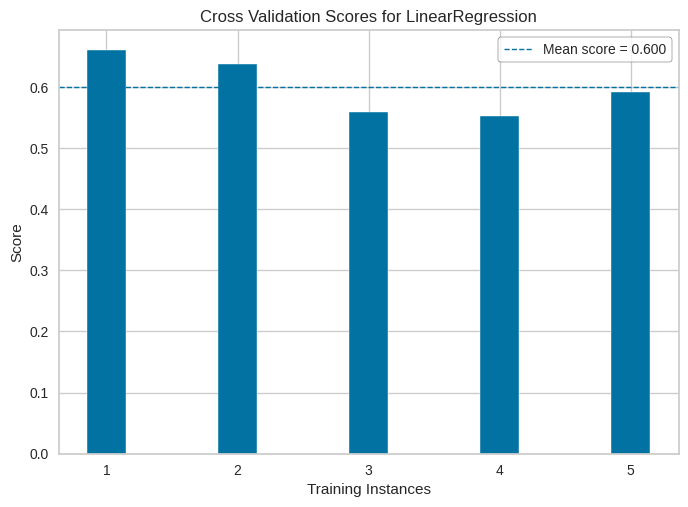

In [13]:
from yellowbrick.model_selection import cv_scores

visualizer = cv_scores(pipe, auto_X, auto_y, scoring='r2', cv = kcv_index)

Using the 5-fold CV, we can conclude that the regression model's predictive performance on our test data set is 60% on the average. By using [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) helper function, we can also investigate MSE test and train for each split.

In [14]:
from sklearn.metrics import get_scorer_names
#see available scorer metrics other than r2
#there is 'neg_mean_squared_error'
#get_scorer_names()

In [15]:
nmse_scores = cross_validate(pipe, auto_X, auto_y, scoring='neg_mean_squared_error', cv = kcv_index, return_train_score=True)
nmse_scores = pd.DataFrame(nmse_scores)
nmse_scores

,fit_time,score_time,test_score,train_score
0,0.006200,0.003989,-19.376823,-25.166249
1,0.004483,0.003078,-23.487864,-24.163037
2,0.004283,0.002660,-25.615149,-23.589354
3,0.004735,0.002890,-26.533084,-23.395206
4,0.004299,0.002697,-26.315881,-23.476080


In [16]:
#multiply scores by -1 to get MSEs
nmse_scores[["train_score","test_score"]] = -1*nmse_scores[["train_score","test_score"]]
mse_scores = nmse_scores
mse_scores

,fit_time,score_time,test_score,train_score
0,0.006200,0.003989,19.376823,25.166249
1,0.004483,0.003078,23.487864,24.163037
2,0.004283,0.002660,25.615149,23.589354
3,0.004735,0.002890,26.533084,23.395206
4,0.004299,0.002697,26.315881,23.476080


In [17]:
print("5-fold cross-validated MSE on Test data: %0.4f" % mse_scores.test_score.mean())

5-fold cross-validated MSE on Test data: 24.2658


Alternatively, for returning test scores per fold only, we can use [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [18]:
kfold_mse_test = -1*cross_val_score(pipe, auto_X, auto_y, scoring='neg_mean_squared_error', cv = kcv_index).mean()

In [19]:
print("5-fold cross-validated MSE on Test data: %0.4f" % kfold_mse_test)

5-fold cross-validated MSE on Test data: 24.2658


Using the 5-fold CV, we can conclude that the regression model's MSE on test data is 24.26 on the average. 

## How to choose K?

- In practice, one typically uses  K=5 and K=10.
- There is no formal rule as to the size of K; however, as K gets larger, the difference between the estimated performance and the true performance to be seen on the test set will decrease.
- On the other hand, using too large K can introduce **computational burdens**.
- When K=n, it is called as `leave-one-out cross validation (LOOCV)` which is the most extreme approach.

In [20]:
## Leave-One-Out Cross-Validation

In [21]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, KFold, cross_val_score


pipe = make_pipeline(PolynomialFeatures(degree=1, include_bias=False), 
                     LinearRegression())
    
#LeaveOneOut() function is not suggested for large data sets, since it is computationally heavy
loocv_index = KFold(n_splits=auto_X.shape[0], shuffle=True, random_state=1300) 

loocv_mse_test = -1*cross_val_score(pipe, auto_X, auto_y, scoring='neg_mean_squared_error', cv = loocv_index).mean()

In [22]:
print("5-fold cross-validated MSE on Test data: %0.4f" % loocv_mse_test)

5-fold cross-validated MSE on Test data: 24.2724


## Benefits of Cross-Validation over One-time Splitting

- Having multiple splits of the data provides some information about how sensitive our model is to the selection of the training set. We can see that MSE test value is changing between 19.3768 and 26.1663. It provides us an idea that how the model perform in the worst case and best case scenarios when applied to new data.

- Another benefit of cross-validation is that we use our data more effectively compared to the one-time splitting. When using one-time splitting, we usually use 80% of the data for training and 20% of the data for testing. When using 5-fold cross-validation, in each iteration we nearly use 80% (4/5) of the data for training, and when using 10-fold cross-validation, in each iteration we nearly use 90% (9/10) of the data for training. More data will usually result in more accurate models.

## Disadvantages of Cross-Validation over One-time Splitting

- Since in k-fold cross-validation  we are now training k models instead of a single model, cross-validation will be roughly k times slower than doing a single split of the data.

## Cross-Validation Approach for Model Selection

**Cross-validation** can also be used to select the **appropriate level of flexibility** of a model. 

## Polynomial Degree Choice with Cross-Validation

Actually, we have multiple choices to build a predictive model for `mpg` of a car based on the the feature `horsepower`: we could use linear regression, 2nd order polynomial regression, 3rd order polynomial regression, etc. Then the question is how to choose the order of polynomial regression?

When we have a limited amount of data, we may not want to further reduce our potential training data by reassigning some part as validation. Luckily, we can use `k-fold cross-validation` on `training and validation sets` for `model selection` too! 

### Model Choice for Polynomial Degree

- **Step 1:** We should split our data set as `train`, `validation`, and `test` data. 
- **Step 2:** For each polynomial degree, say, $p=1,\ldots,10$, **apply the k-fold cross-validation to train+validation set**, and save the ${MSE}_{val}^{(CV)}$ (average of the k MSEs calculated from each folds' validation set).
- **Step 3:** We select the degree value $p$ as **the optimum value** which gives the minimum ${MSE}_{val}^{(CV)}$.
- Until now, we only estimated the optimum value of the $p$ (no test data is involved up to this point).

![](img/train_val_test.png)

### Final Model Performance Evaluation

- **Step 4:** With the selected optimum value of $p$, **RE-TRAIN the model on train + validation set**, and based on the **learned coefficients**, calculate MSE on the test set.

In [23]:
#split the data set as train_val and test
from sklearn.model_selection import train_test_split

#Split 80:20
auto_X_bigtrain, auto_X_test, auto_y_bigtrain, auto_y_test = train_test_split(auto_X, auto_y, test_size=0.2, random_state=1300)

In [24]:
from sklearn import set_config
set_config(transform_output="pandas")  

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold, cross_val_score

p_order = np.arange(1,11)   

MSE_val = []

for p in p_order:
    
    pipe = make_pipeline(PolynomialFeatures(degree=p, include_bias=False), 
                     LinearRegression())

    #print("p", p)
    
    kcv_index = KFold(n_splits=5, shuffle=True, random_state=1300)

    mse_score_val =  -1*cross_val_score(pipe, auto_X_bigtrain, auto_y_bigtrain, scoring='neg_mean_squared_error', cv = kcv_index).mean()  
    #cross_validate:return_train_score=True can also be used for checking underfitting & overfitting
    
    MSE_val.append(mse_score_val)

In [25]:
MSE_val

[25.602000457185483,
 19.6480283476745,
 19.551268328376477,
 19.742671739627482,
 19.647655908384145,
 19.838458973372113,
 19.72584799225039,
 19.644123449411037,
 19.539691536762323,
 19.524722363886468]

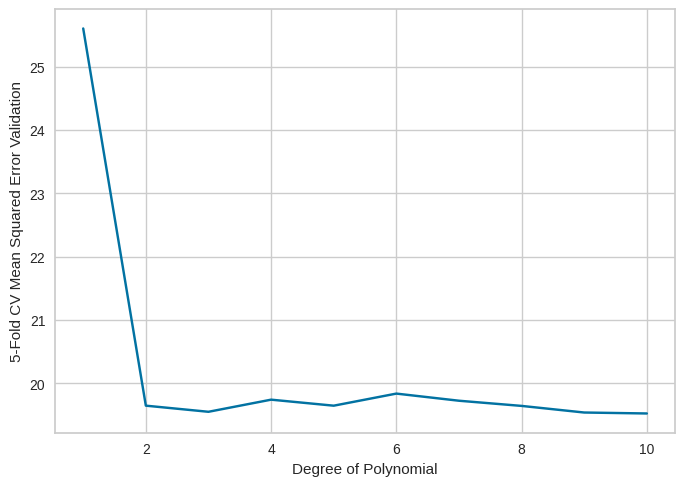

In [26]:
#visualize the results
import matplotlib.pyplot as plt

plt.plot(p_order, MSE_val)
plt.ylabel('5-Fold CV Mean Squared Error Validation')
plt.xlabel('Degree of Polynomial')
plt.show();

The graph attains its minimum when p=3. This indicates that this data is better represented with a 3rd order polnomial regression.

In [27]:
#retrain the final model on train+val, which is the 2nd order polynomial regression

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


pipe = make_pipeline(PolynomialFeatures(degree=3, include_bias=False), 
                     LinearRegression())

pipe.fit(auto_X_train_val, auto_y_train_val)
   
y_test_pred = pipe.predict(auto_X_test)
    
mse_test_final = mean_squared_error(auto_y_test, y_test_pred)

NameError: name 'auto_X_train_val' is not defined

In [ ]:
print(('MSE on Test Data: %.4f' % mse_test_final))

We can safely say that this data set is better represented by a 3rd order polynomial and the built model's generalization error on the test is 17.5995.

## In a nut-shell

- You have a model with different flexibilities (polynomial regression, ridge, lasso regression) and you want to pick the best (optimum) flexibility. You can select the flexibility based on one-time train-validation+test split or cross-validated train-validation+test split approach and then report the optimum model performance on the test data.

## References

- James, G., Witten, D., Hastie, T., Tibshirani, R., James, G., Witten, D., and Tibshirani, R. (2021). Statistical learning. An introduction to statistical learning: with applications in R. https://www.statlearning.com/
- https://bradleyboehmke.github.io/HOML/process.html
- https://compneuro.neuromatch.io/tutorials/W1D2_ModelFitting/student/W1D2_Tutorial6.html
- https://stackoverflow.com/questions/47442102/how-to-find-the-best-degree-of-polynomials

In [ ]:
import session_info
session_info.show()